# Support Vector Regression (SVR)

## Importing the libraries

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [68]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
Y = dataset.iloc[:, -1].values

In [69]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [70]:
Y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [71]:
Y = Y.reshape(len(Y), 1)

In [72]:
Y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

## Feature Scaling

In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
ss_X = StandardScaler()
ss_Y = StandardScaler()

In [75]:
X = ss_X.fit_transform(X)

In [76]:
Y = ss_Y.fit_transform(Y)

## Training the SVR model on the whole dataset

In [77]:
from sklearn.svm import SVR

In [78]:
svr = SVR(kernel = 'rbf')

In [79]:
svr.fit(X, Y)

C:\Users\Soumyajit\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [135]:
svr.predict(ss_X.transform([[6.5]]))

array([-0.27861589])

## Visualising the SVR results

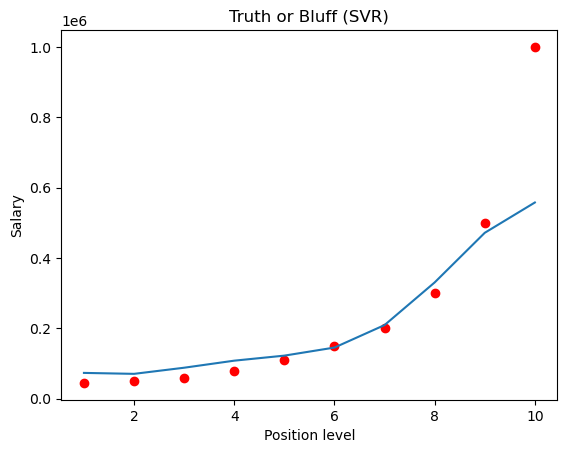

In [140]:
plt.scatter(ss_X.inverse_transform(X), ss_Y.inverse_transform(Y), color = 'red')
plt.plot(ss_X.inverse_transform(X), ss_Y.inverse_transform(svr.predict(X).reshape(len(X), 1)))
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

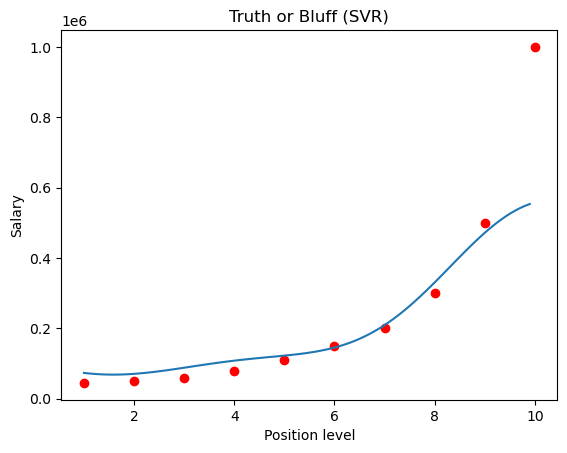

In [121]:
X_grid = np.arange(min(ss_X.inverse_transform(X)), max(ss_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(ss_X.inverse_transform(X), ss_Y.inverse_transform(Y), color="red")
plt.plot(X_grid, ss_Y.inverse_transform(svr.predict(ss_X.transform(X_grid)).reshape(len(X_grid), 1)))
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()